In [31]:
import sklearn
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from ellipse import confidence_ellipse, scatter_with_ellipse

sns.set(style='ticks')

In [2]:
data = pd.read_csv("./data/penguins_size.csv", delimiter=",")

In [3]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
data = data.dropna()
# lists for coloring categorically
_species = list(set(data.species))
_island = list(set(data.island))
_sex = list(set(data.sex))

In [5]:
#sns.relplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species', hue_order=_species, aspect=1.61)
#plt.show()

In [6]:
#sns.relplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='sex', hue_order=_sex, aspect=1.61)
#plt.show()

In [7]:
adelie_df = data[data["species"] == "Adelie"][["culmen_length_mm","culmen_depth_mm"]]
gentoo_df = data[data["species"] == "Gentoo"][["culmen_length_mm","culmen_depth_mm"]]
cstrap_df = data[data["species"] == "Chinstrap"][["culmen_length_mm","culmen_depth_mm"]]
male_df = data[data["sex"] == "MALE"][["culmen_length_mm","culmen_depth_mm"]]
female_df = data[data["sex"] == "FEMALE"][["culmen_length_mm","culmen_depth_mm"]]

### Starting Off
There are three species of penguin.  Could a "well educated" person guess the species of a penguin based of the penguin's culmen length and depth?  What about the penguin's sex?

In this example, I'll define a "well educated" person as a person who has/knows the confidence interval(forming an ellipse) for penguin culmen length and depth.  That is to say, if a person knows the average culmen length and depth along with a one to three sigma confidence interval, for a given penguin classification, could that person be expected to classify an arbitrary penguin correctly?

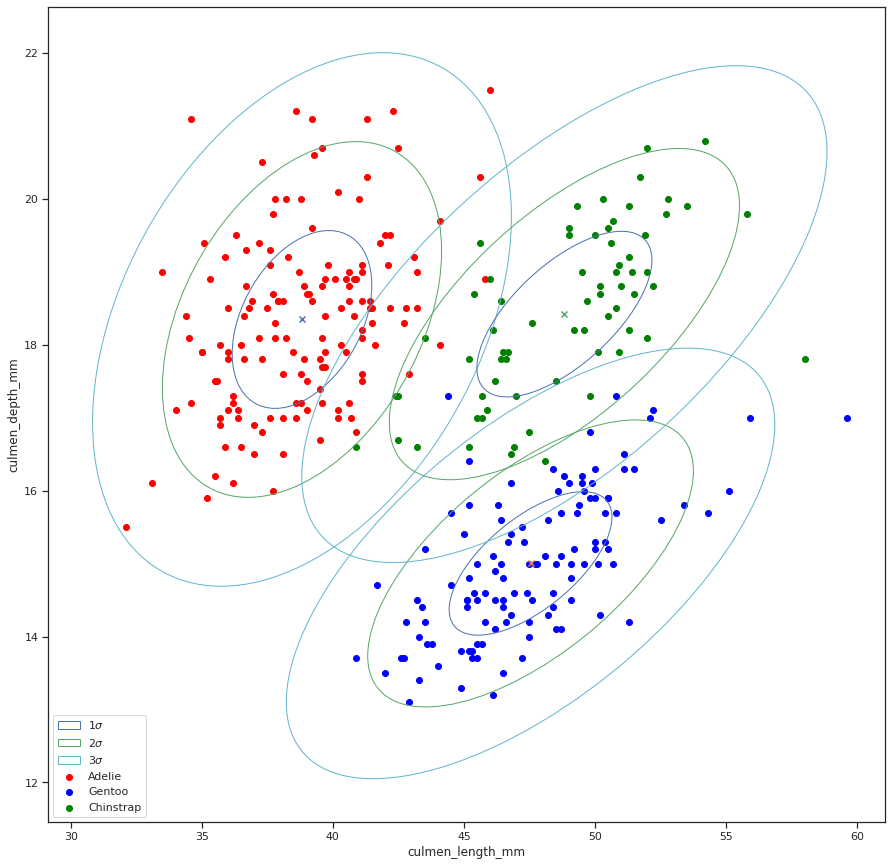

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
scatter_with_ellipse(adelie_df.culmen_length_mm, adelie_df.culmen_depth_mm, ax, 
                     p_label="Adelie", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="red",n_std=[1,2,3], c_std=['b','g','c'], set_label=True)
scatter_with_ellipse(gentoo_df.culmen_length_mm, gentoo_df.culmen_depth_mm, ax, 
                     p_label="Gentoo", color="blue", n_std=[1,2,3], c_std=['b','g','c'],
                     set_label=False)
scatter_with_ellipse(cstrap_df.culmen_length_mm, cstrap_df.culmen_depth_mm, ax, 
                     p_label="Chinstrap", color="green", n_std=[1,2,3], c_std=['b','g','c'],
                     set_label=False)
ax.legend()
plt.show()

### Informal Inferences on the Species Plots
Across the three species of penguin, the confidence intervals are relatively distinct.  No $1\sigma$ interval overlap and there is only very minimal overlap of the $2\sigma$ ellipses.

At a confidence level of $2\sigma$ it would be reasonable to argue that all three species are significantly different in culmen length and culmen depth.  

At $3\sigma$ there is a a fair amount of overlap between Chinstrap and the other two species.  Gentoo and Adelie have no overlap over any of their confidence ellipse and can be called significantly different in culmen length and depth.

Following these inferences, it seems 

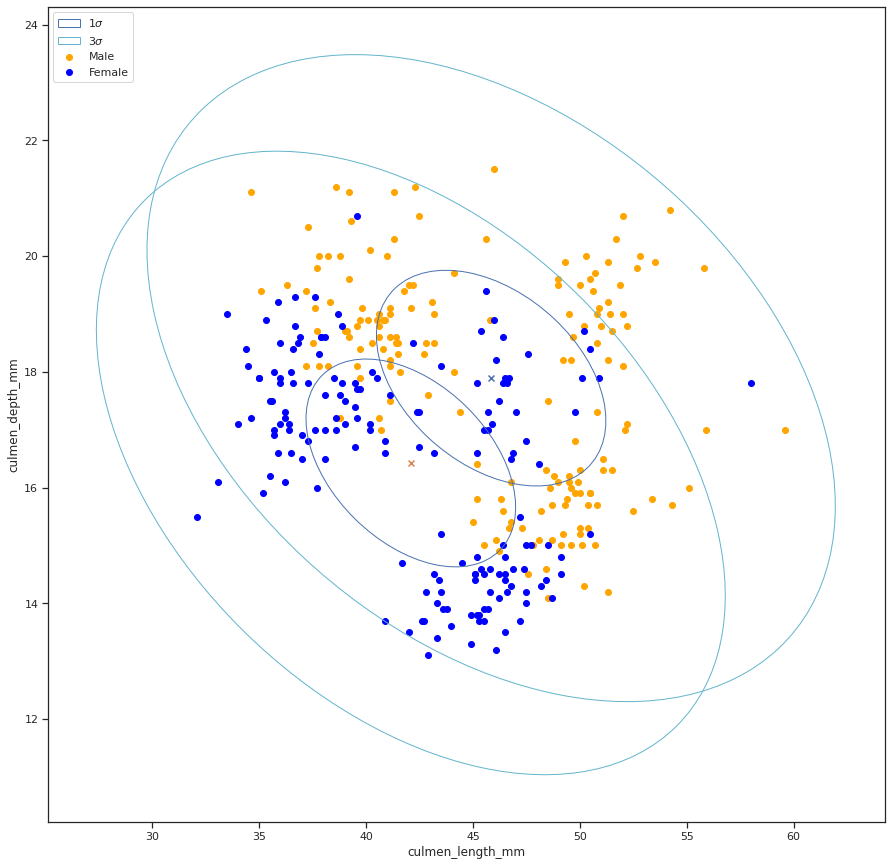

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
scatter_with_ellipse(male_df.culmen_length_mm, male_df.culmen_depth_mm, ax, 
                     p_label="Male", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="orange",n_std=[1,3], c_std=['b','c'], set_label=True)
scatter_with_ellipse(female_df.culmen_length_mm, female_df.culmen_depth_mm, ax, 
                     p_label="Female", color="blue", n_std=[1,3], c_std=['b','c'],
                     set_label=False)
ax.legend()
plt.show()

### Informal Inferences on the Sex Plots
Even on the smallest confidence ellipse, there is overlap between the confidence interval between Male and Female.  This shows that purely based off of culmen length and depth that the penguin sex is not very distinguishable.

Most notably, the $1\sigma$ elipse and mean culmen length and depth for male penguins almost seems to be centered on a cluster of female penguins.  This is of course purely coincidental.

With the species plot in mind, it is clear that species is a confounding factor in distinguishing penguin sex.  So how visually distinguishable are penguins when accounting for sex and species?

In [10]:
adelie_m_df = data[(data["sex"] == "MALE") & (data["species"] == "Adelie")][["culmen_length_mm","culmen_depth_mm"]]
adelie_f_df = data[(data["sex"] == "FEMALE") & (data["species"] == "Adelie")][["culmen_length_mm","culmen_depth_mm"]]

gentoo_m_df = data[(data["sex"] == "MALE") & (data["species"] == "Gentoo")][["culmen_length_mm","culmen_depth_mm"]]
gentoo_f_df = data[(data["sex"] == "FEMALE") & (data["species"] == "Gentoo")][["culmen_length_mm","culmen_depth_mm"]]

cstrap_m_df = data[(data["sex"] == "MALE") & (data["species"] == "Chinstrap")][["culmen_length_mm","culmen_depth_mm"]]
cstrap_f_df = data[(data["sex"] == "FEMALE") & (data["species"] == "Chinstrap")][["culmen_length_mm","culmen_depth_mm"]]

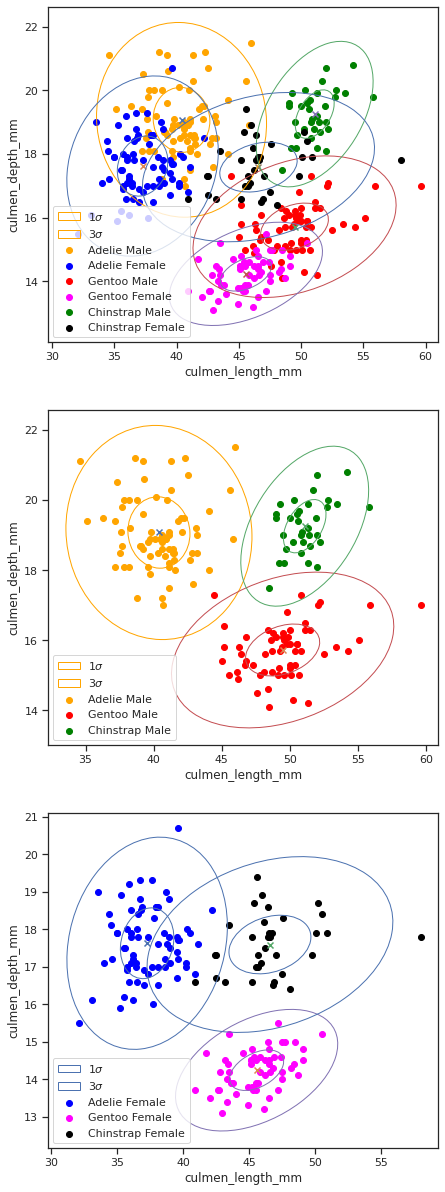

In [11]:
fig, axs = plt.subplots(3,1,figsize=(7,21))
ax = axs[0]
scatter_with_ellipse(adelie_m_df.culmen_length_mm, adelie_m_df.culmen_depth_mm, ax, 
                     p_label="Adelie Male", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="orange",n_std=[1,3], c_std=['orange','orange'], set_label=True)
scatter_with_ellipse(adelie_f_df.culmen_length_mm, adelie_f_df.culmen_depth_mm, ax, 
                     p_label="Adelie Female", color="blue", n_std=[1,3], c_std=['b','b'],
                     set_label=False)
scatter_with_ellipse(gentoo_m_df.culmen_length_mm, gentoo_m_df.culmen_depth_mm, ax, 
                     p_label="Gentoo Male", color="red", n_std=[1,3], c_std=['r','r'],
                     set_label=False)
scatter_with_ellipse(gentoo_f_df.culmen_length_mm, gentoo_f_df.culmen_depth_mm, ax, 
                     p_label="Gentoo Female", color="magenta", n_std=[1,3], c_std=['m','m'],
                     set_label=False)
scatter_with_ellipse(cstrap_m_df.culmen_length_mm, cstrap_m_df.culmen_depth_mm, ax, 
                     p_label="Chinstrap Male", color="green", n_std=[1,3], c_std=['g','g'],
                     set_label=False)
scatter_with_ellipse(cstrap_f_df.culmen_length_mm, cstrap_f_df.culmen_depth_mm, ax, 
                     p_label="Chinstrap Female", color="black", n_std=[1,3], c_std=['b','b'],
                     set_label=False)
ax.legend()

ax1 = axs[1]
scatter_with_ellipse(adelie_m_df.culmen_length_mm, adelie_m_df.culmen_depth_mm, ax1, 
                     p_label="Adelie Male", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="orange",n_std=[1,3], c_std=['orange','orange'], set_label=True)

scatter_with_ellipse(gentoo_m_df.culmen_length_mm, gentoo_m_df.culmen_depth_mm, ax1, 
                     p_label="Gentoo Male", color="red", n_std=[1,3], c_std=['r','r'],
                     set_label=False)

scatter_with_ellipse(cstrap_m_df.culmen_length_mm, cstrap_m_df.culmen_depth_mm, ax1, 
                     p_label="Chinstrap Male", color="green", n_std=[1,3], c_std=['g','g'],
                     set_label=False)
ax1.legend()

ax2 = axs[2]
scatter_with_ellipse(adelie_f_df.culmen_length_mm, adelie_f_df.culmen_depth_mm, ax2, 
                     p_label="Adelie Female", x_ax="culmen_length_mm", y_ax="culmen_depth_mm",
                     color="blue", n_std=[1,3], c_std=['b','b'], set_label=True)
scatter_with_ellipse(gentoo_f_df.culmen_length_mm, gentoo_f_df.culmen_depth_mm, ax2, 
                     p_label="Gentoo Female", color="magenta", n_std=[1,3], c_std=['m','m'],
                     set_label=False)
scatter_with_ellipse(cstrap_f_df.culmen_length_mm, cstrap_f_df.culmen_depth_mm, ax2, 
                     p_label="Chinstrap Female", color="black", n_std=[1,3], c_std=['b','b'],
                     set_label=False)

ax2.legend()
plt.show()

### Informal Inferences on Species and Sex Plots
With penguins grouped by species and sex, the plot gets quite busy and the visual clarity is quite poor.  A cursory glance at the plot shows significant overlap in the confidence interval between the male and female penguins of the same species.  There is also a considerable amount of overlap between the confidence ellipse between Chinstrap females and Adelie males.  Both of these results are to be expected considering the previous plots.

More interestingly and visually clearer are the plots when the penguins are separated by sex.  For male penguins there is only a small amount overlap between the $3\sigma$ ellipses compared to very significant overlap in the plot with both sexes.  Female Chinstrap and Adelie penguins suprisingly seem to show more overlap compared when both sexes where accounted for.

With just the three pieces of information, culmen length, culmen depth, and sex, an "educated" person can make a relatively accurate predictions on the penguin species.  It's not going to be perfect especially considering the amount of overlap between female Adelie and Chinstrap penguin.  If we think an "educated" person can predict quite well, let's examine how simple machine learning predictors can do

### Nearest Neighbor Predictor
A simple predictor is the K-Nearest Neighbor Predictor.  This predictor will sample the nearest known data points and classifying the point by the majority (or plurality) class.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (/home/william/.local/lib/python3.7/site-packages/sklearn/inspection/__init__.py)

In [21]:
y = np.ravel(data[["species"]].to_numpy())
X = data[["culmen_length_mm","culmen_depth_mm"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
acc = neigh.score(X_test, y_test)
print("Classifier accuracy is", acc)

Classifier accuracy is 0.9459459459459459


NameError: name 'DecisionBoundaryDisplay' is not defined

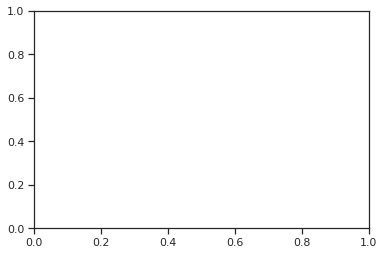

In [32]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(neigh,X_train,cmap=cmap_light,ax=ax,
        response_method="predict",plot_method="pcolormesh",xlabel="culmen_length_mm",
        ylabel="culmen_depth_mm", shading="auto",)

# Plot also the training points
sns.scatterplot(x= X_test,y=y_test,hue=_species,palette=cmap_bold,alpha=1.0,
                edgecolor="black",)
plt.show()


In [34]:
sklearn.__version__

'0.23.2'